In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno


In [264]:
data=pd.read_csv("G:\Datasets\SaleAnalysis\SalesKaggle.csv")

In [265]:
data.head()

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54
2,4,Historical,612701,0.0,0.0,D,0,0,340464.0,46.00,2013,34,30.19,27.97
3,6,Historical,115883,1.0,1.0,D,4,1,334011.0,100.00,2006,20,133.93,83.15
4,7,Historical,863939,1.0,1.0,D,2,1,1287938.0,121.95,2010,28,4.00,23.99


In [266]:
data.isnull().sum()

Order                    0
File_Type                0
SKU_number               0
SoldFlag            122921
SoldCount           122921
MarketingType            0
ReleaseNumber            0
New_Release_Flag         0
StrengthFactor           0
PriceReg                 0
ReleaseYear              0
ItemCount                0
LowUserPrice             0
LowNetPrice              0
dtype: int64

In [267]:
data.shape

(198917, 14)

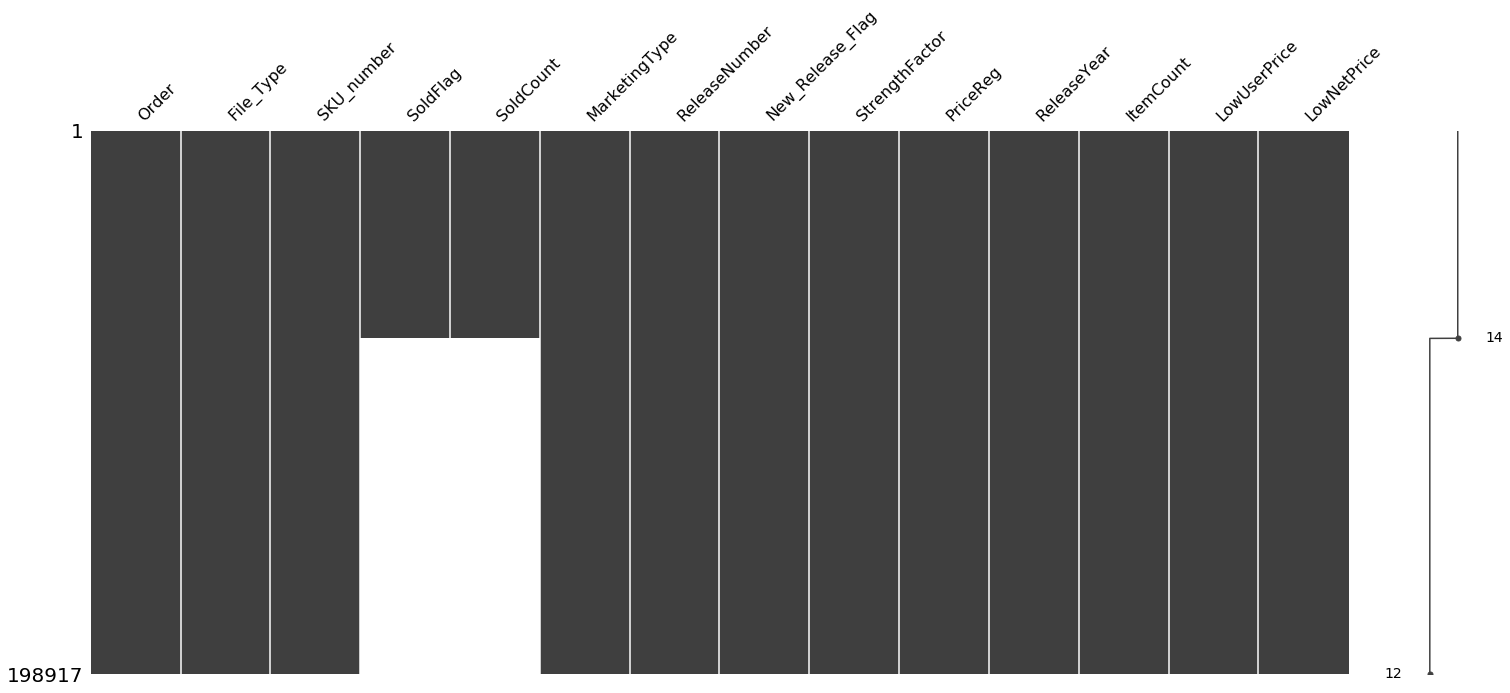

In [268]:
missingno.matrix(data)

In [269]:
data=data.drop(["SKU_number","Order","SoldCount","ReleaseYear"],axis=1)

In [270]:
data.head()

,File_Type,SoldFlag,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ItemCount,LowUserPrice,LowNetPrice
0,Historical,0.0,D,15,1,682743.0,44.99,8,28.97,31.84
1,Historical,0.0,D,7,1,1016014.0,24.81,39,0.00,15.54
2,Historical,0.0,D,0,0,340464.0,46.00,34,30.19,27.97
3,Historical,1.0,D,4,1,334011.0,100.00,20,133.93,83.15
4,Historical,1.0,D,2,1,1287938.0,121.95,28,4.00,23.99


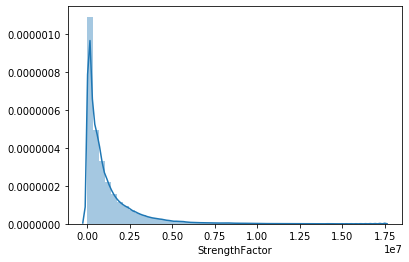

In [271]:
sns.distplot(data.StrengthFactor)

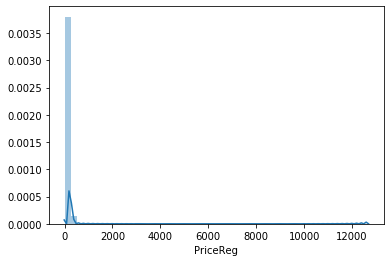

In [272]:
sns.distplot(data.PriceReg)

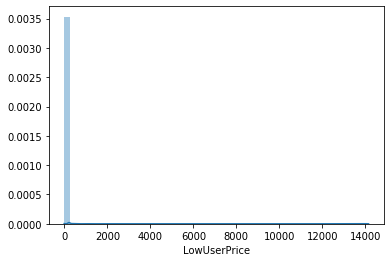

In [273]:
sns.distplot(data.LowUserPrice)

In [274]:
data.MarketingType.value_counts()

S    100946
D     97971
Name: MarketingType, dtype: int64

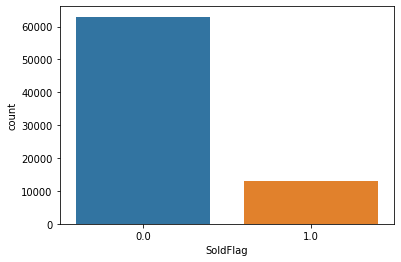

In [275]:
sns.countplot(data.SoldFlag)

In [276]:
data.head()

,File_Type,SoldFlag,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ItemCount,LowUserPrice,LowNetPrice
0,Historical,0.0,D,15,1,682743.0,44.99,8,28.97,31.84
1,Historical,0.0,D,7,1,1016014.0,24.81,39,0.00,15.54
2,Historical,0.0,D,0,0,340464.0,46.00,34,30.19,27.97
3,Historical,1.0,D,4,1,334011.0,100.00,20,133.93,83.15
4,Historical,1.0,D,2,1,1287938.0,121.95,28,4.00,23.99


In [277]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [278]:
scdata=pd.DataFrame(sc.fit_transform(data.drop(["File_Type","SoldFlag","MarketingType","New_Release_Flag"],axis=1)),columns=data.drop(["File_Type","SoldFlag","MarketingType","New_Release_Flag"],axis=1).columns)

In [225]:
scdata.head()

,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ItemCount,LowUserPrice,LowNetPrice
0,2.998732,0.746345,-0.285379,-0.529252,-0.890391,-0.029139,-0.116658
1,0.928463,0.746345,-0.066423,-0.761911,-0.064630,-0.448593,-0.243493
2,-0.883022,-1.339862,-0.510254,-0.517607,-0.197817,-0.011474,-0.146772
3,0.152112,0.746345,-0.514494,0.104971,-0.570742,1.490568,0.282602
4,-0.365455,0.746345,0.112229,0.358037,-0.357642,-0.390677,-0.177741


In [279]:
scdata[["File_Type","SoldFlag","MarketingType","New_Release_Flag"]]=data[["File_Type","SoldFlag","MarketingType","New_Release_Flag"]]

In [280]:
scdata.head()

,ReleaseNumber,StrengthFactor,PriceReg,ItemCount,LowUserPrice,LowNetPrice,File_Type,SoldFlag,MarketingType,New_Release_Flag
0,2.998732,-0.285379,-0.529252,-0.890391,-0.029139,-0.116658,Historical,0.0,D,1
1,0.928463,-0.066423,-0.761911,-0.064630,-0.448593,-0.243493,Historical,0.0,D,1
2,-0.883022,-0.510254,-0.517607,-0.197817,-0.011474,-0.146772,Historical,0.0,D,0
3,0.152112,-0.514494,0.104971,-0.570742,1.490568,0.282602,Historical,1.0,D,1
4,-0.365455,0.112229,0.358037,-0.357642,-0.390677,-0.177741,Historical,1.0,D,1


In [281]:
data=pd.get_dummies(scdata)

In [282]:
data.head()

,ReleaseNumber,StrengthFactor,PriceReg,ItemCount,LowUserPrice,LowNetPrice,SoldFlag,New_Release_Flag,File_Type_Active,File_Type_Historical,MarketingType_D,MarketingType_S
0,2.998732,-0.285379,-0.529252,-0.890391,-0.029139,-0.116658,0.0,1,0,1,1,0
1,0.928463,-0.066423,-0.761911,-0.064630,-0.448593,-0.243493,0.0,1,0,1,1,0
2,-0.883022,-0.510254,-0.517607,-0.197817,-0.011474,-0.146772,0.0,0,0,1,1,0
3,0.152112,-0.514494,0.104971,-0.570742,1.490568,0.282602,1.0,1,0,1,1,0
4,-0.365455,0.112229,0.358037,-0.357642,-0.390677,-0.177741,1.0,1,0,1,1,0


C:\Users\Asus\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  elif normed:
C:\Users\Asus\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  # 2018-06-13, numpy 1.15.0 (this was not noisily deprecated in 1.6)


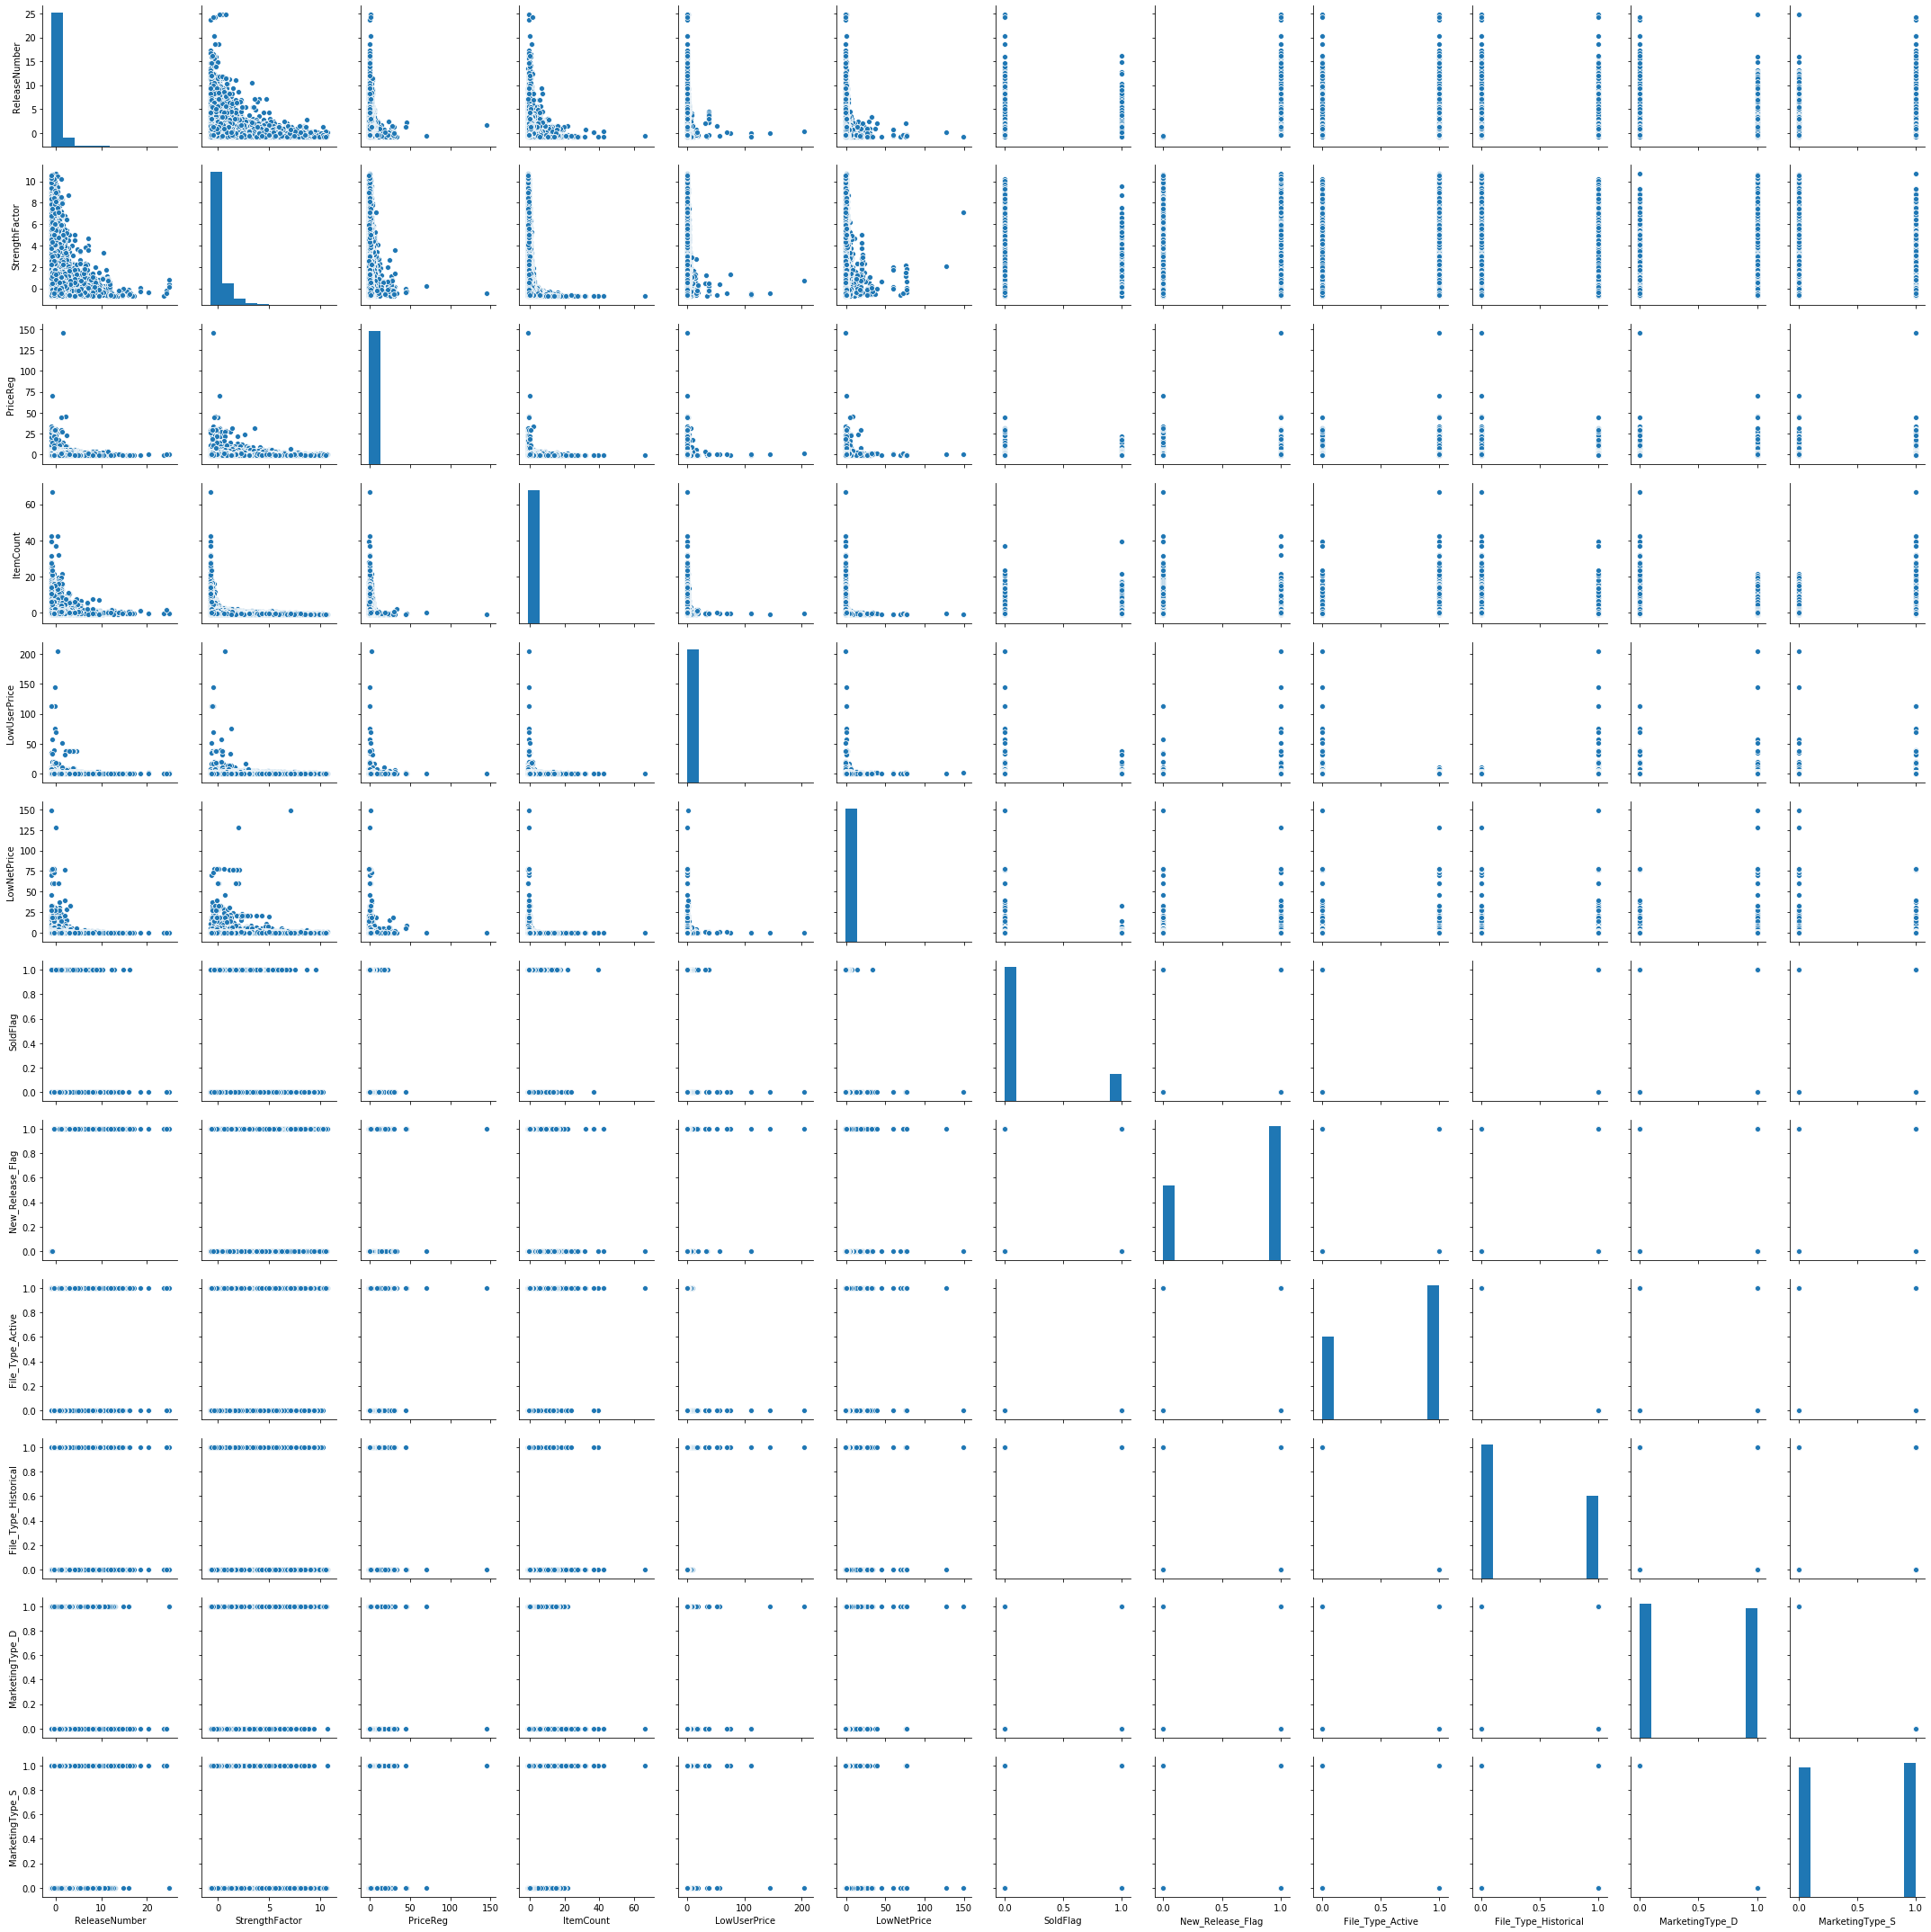

In [334]:
sns.pairplot(data)

In [283]:
test=data[data.SoldFlag.isnull()]

In [284]:
test.SoldFlag.value_counts()

Series([], Name: SoldFlag, dtype: int64)

In [285]:
test.shape

(122921, 12)

In [286]:
train=data[data.SoldFlag.notnull()]

In [287]:
train.head()

,ReleaseNumber,StrengthFactor,PriceReg,ItemCount,LowUserPrice,LowNetPrice,SoldFlag,New_Release_Flag,File_Type_Active,File_Type_Historical,MarketingType_D,MarketingType_S
0,2.998732,-0.285379,-0.529252,-0.890391,-0.029139,-0.116658,0.0,1,0,1,1,0
1,0.928463,-0.066423,-0.761911,-0.064630,-0.448593,-0.243493,0.0,1,0,1,1,0
2,-0.883022,-0.510254,-0.517607,-0.197817,-0.011474,-0.146772,0.0,0,0,1,1,0
3,0.152112,-0.514494,0.104971,-0.570742,1.490568,0.282602,1.0,1,0,1,1,0
4,-0.365455,0.112229,0.358037,-0.357642,-0.390677,-0.177741,1.0,1,0,1,1,0


In [288]:
train["SoldFlag"].unique()

array([0., 1.])

In [289]:
test.head()

,ReleaseNumber,StrengthFactor,PriceReg,ItemCount,LowUserPrice,LowNetPrice,SoldFlag,New_Release_Flag,File_Type_Active,File_Type_Historical,MarketingType_D,MarketingType_S
75996,1.446030,0.088276,0.022191,0.201745,-0.282664,0.173118,NaN,1,1,0,0,1
75997,0.152112,0.847492,-0.483019,-1.103491,-0.448593,0.016869,NaN,1,1,0,0,1
75998,-0.106671,3.793226,-0.529713,-1.103491,-0.448593,-0.364415,NaN,1,1,0,0,1
75999,1.187247,-0.673781,1.476948,0.068557,-0.250087,0.100986,NaN,1,1,0,0,1
76000,0.410896,3.814292,-0.080073,-1.103491,-0.448593,0.256534,NaN,1,1,0,0,1


In [290]:
xtest11=test.drop("SoldFlag",axis=1)

In [291]:
xtrain1=train.drop("SoldFlag",axis=1)

In [292]:
ytrain1=train.SoldFlag

In [293]:
# Train Test Split

In [294]:
from sklearn.model_selection import train_test_split

In [295]:
xtrain,xtest,ytrain,ytest=train_test_split(xtrain1,ytrain1,test_size=0.30,random_state=2)

In [296]:
xtrain.head()

,ReleaseNumber,StrengthFactor,PriceReg,ItemCount,LowUserPrice,LowNetPrice,New_Release_Flag,File_Type_Active,File_Type_Historical,MarketingType_D,MarketingType_S
22530,1.704814,-0.219424,-0.010898,-0.304367,0.286936,0.234357,1,0,1,1,0
63902,-0.365455,-0.476745,0.047325,-0.703929,-0.448593,-0.107709,1,0,1,0,1
33237,0.152112,0.011445,0.174146,0.068557,0.637326,-0.008264,1,0,1,1,0
19334,-0.365455,0.683313,-0.356198,-0.730566,-0.448593,0.090870,1,0,1,1,0
73705,-0.106671,-0.647342,-0.529252,0.308294,-0.002787,-0.076584,1,0,1,0,1


In [297]:
ytrain.head()

22530    1.0
63902    0.0
33237    0.0
19334    0.0
73705    0.0
Name: SoldFlag, dtype: float64

In [298]:
# Decision Tree

In [299]:
from sklearn.tree import DecisionTreeClassifier

In [300]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [301]:
dt=DecisionTreeClassifier()

In [302]:
ypred=dt.fit(xtrain,ytrain).predict(xtest)

              precision    recall  f1-score   support

         0.0       0.85      0.84      0.85     18860
         1.0       0.29      0.30      0.30      3939

    accuracy                           0.75     22799
   macro avg       0.57      0.57      0.57     22799
weighted avg       0.76      0.75      0.75     22799

Accuracy: 75.04 %


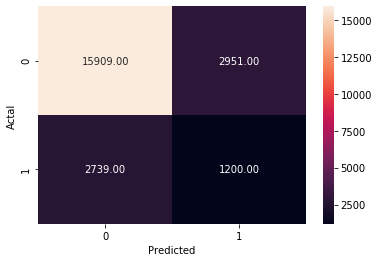

In [303]:
print (classification_report(ytest, ypred))
print ("Accuracy: {:.2f} %".format(accuracy_score(ytest, ypred) * 100))

sns.heatmap(confusion_matrix(ytest, ypred), annot=True, fmt='.2f')
plt.xlabel("Predicted")
plt.ylabel("Actal")
plt.show()

In [304]:
# Random Forest


In [305]:
from sklearn.ensemble import RandomForestClassifier
batman=RandomForestClassifier()

In [306]:
ypred1=batman.fit(xtrain,ytrain).predict(xtest)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90     18860
         1.0       0.48      0.16      0.24      3939

    accuracy                           0.82     22799
   macro avg       0.66      0.56      0.57     22799
weighted avg       0.78      0.82      0.79     22799

Accuracy: 82.46 %


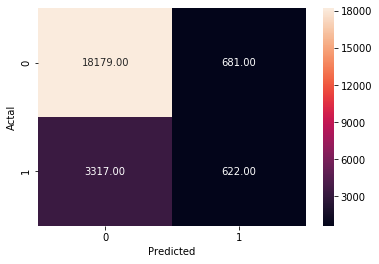

In [307]:
print (classification_report(ytest, ypred1))
print ("Accuracy: {:.2f} %".format(accuracy_score(ytest, ypred1) * 100))

sns.heatmap(confusion_matrix(ytest, ypred1), annot=True, fmt='.2f')
plt.xlabel("Predicted")
plt.ylabel("Actal")
plt.show()

In [40]:
from sklearn.model_selection import GridSearchCV

param_dist = {'max_depth': [2, 3, 4],'bootstrap': [True, False],'max_features': ['auto', 'sqrt', 'log2', None],'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(batman, cv = 10,param_grid=param_dist)


In [41]:
cv_rf.fit(xtrain,ytrain)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [42]:
cv_rf.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 4,
 'max_features': None}

In [308]:
batman=RandomForestClassifier(bootstrap = True, criterion = 'gini', max_depth = 3, max_features = None)

In [309]:
ypred2=batman.fit(xtrain,ytrain).predict(xtest)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

         0.0       0.84      0.99      0.91     18860
         1.0       0.66      0.06      0.12      3939

    accuracy                           0.83     22799
   macro avg       0.75      0.53      0.51     22799
weighted avg       0.80      0.83      0.77     22799

Accuracy: 83.24 %


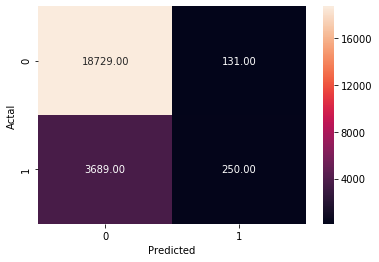

In [310]:
print (classification_report(ytest, ypred2))
print ("Accuracy: {:.2f} %".format(accuracy_score(ytest, ypred2) * 100))

sns.heatmap(confusion_matrix(ytest, ypred2), annot=True, fmt='.2f')
plt.xlabel("Predicted")
plt.ylabel("Actal")
plt.show()

In [311]:
# Logistic Regression

In [312]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [313]:
ypred3=lr.fit(xtrain,ytrain).predict(xtest)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

         0.0       0.84      0.99      0.91     18860
         1.0       0.61      0.08      0.15      3939

    accuracy                           0.83     22799
   macro avg       0.72      0.54      0.53     22799
weighted avg       0.80      0.83      0.78     22799

Accuracy: 83.23 %


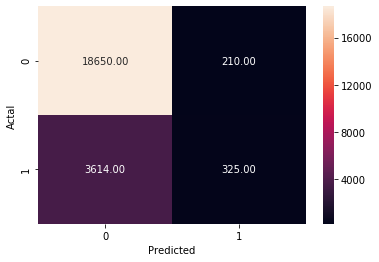

In [314]:
print (classification_report(ytest, ypred3))
print ("Accuracy: {:.2f} %".format(accuracy_score(ytest, ypred3) * 100))

sns.heatmap(confusion_matrix(ytest, ypred3), annot=True, fmt='.2f')
plt.xlabel("Predicted")
plt.ylabel("Actal")
plt.show()

In [316]:
# KNN Model

In [317]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [318]:
ypred7=knn.fit(xtrain,ytrain).predict(xtest)

              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89     18860
         1.0       0.42      0.20      0.27      3939

    accuracy                           0.81     22799
   macro avg       0.63      0.57      0.58     22799
weighted avg       0.77      0.81      0.79     22799

Accuracy: 81.35 %


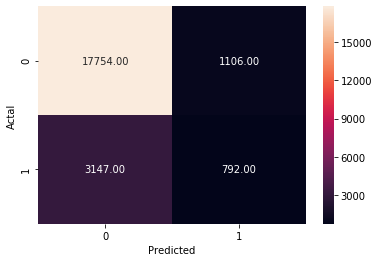

In [319]:
print (classification_report(ytest, ypred7))
print ("Accuracy: {:.2f} %".format(accuracy_score(ytest, ypred7) * 100))

sns.heatmap(confusion_matrix(ytest, ypred7), annot=True, fmt='.2f')
plt.xlabel("Predicted")
plt.ylabel("Actal")
plt.show()

In [322]:
# Applying Grid Search
l=[]
for i in range(1,10):
    l.append(i)
from sklearn.model_selection import GridSearchCV

param_dist = {"n_neighbors": l, "p":[1,2,3]}
cv_rf = GridSearchCV(knn, cv = 3,param_grid=param_dist)
cv_rf.fit(xtrain, np.ravel(ytrain))
print(cv_rf.best_params_)


{'n_neighbors': 8, 'p': 3}


In [327]:
knn=KNeighborsClassifier(n_neighbors= 8, p= 3)

In [328]:
ypred8=knn.fit(xtrain,ytrain).predict(xtest)

              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90     18860
         1.0       0.49      0.13      0.20      3939

    accuracy                           0.83     22799
   macro avg       0.67      0.55      0.55     22799
weighted avg       0.78      0.83      0.78     22799

Accuracy: 82.64 %


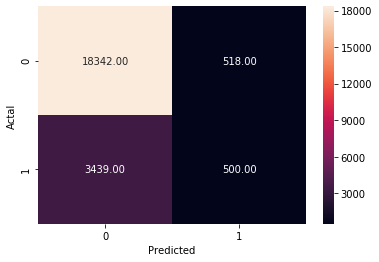

In [329]:
print (classification_report(ytest, ypred8))
print ("Accuracy: {:.2f} %".format(accuracy_score(ytest, ypred8) * 100))

sns.heatmap(confusion_matrix(ytest, ypred8), annot=True, fmt='.2f')
plt.xlabel("Predicted")
plt.ylabel("Actal")
plt.show()

In [326]:
# Trying out XGBoost

In [330]:
from xgboost import XGBRFClassifier
xg=XGBRFClassifier()

In [331]:
ypred9=xg.fit(xtrain,ytrain).predict(xtest)

              precision    recall  f1-score   support

         0.0       0.83      0.99      0.91     18860
         1.0       0.68      0.05      0.10      3939

    accuracy                           0.83     22799
   macro avg       0.76      0.52      0.50     22799
weighted avg       0.81      0.83      0.77     22799

Accuracy: 83.21 %


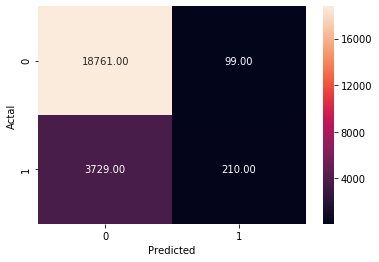

In [333]:
print (classification_report(ytest, ypred9))
print ("Accuracy: {:.2f} %".format(accuracy_score(ytest, ypred9) * 100))

sns.heatmap(confusion_matrix(ytest, ypred9), annot=True, fmt='.2f')
plt.xlabel("Predicted")
plt.ylabel("Actal")
plt.show()